In [1]:
import numpy as np

In [2]:
class ts_preprocessor(object):
    
    def __init__(self):
        self.scaleFactor = 1
    
    def fit_transform(self, data):
        self.scaleFactor = data.max() + 1 if self.scaleFactor == 1.0 else self.scaleFactor
        return np.array([(x / self.scaleFactor) for x in data])
    
    def inverse_transform(self, data):
        return [(x * self.scaleFactor) for x in data]

In [3]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import ReLU
from keras.layers import Dense
from matplotlib import pyplot
from pandas import read_csv

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = read_csv('rht_new.csv', header = 0)
data

,side 1,side 2,side 3
0,3,4,5
1,9,12,15
2,12,16,20
3,15,20,25
4,18,24,30
...,...,...,...
994,2988,3984,4980
995,2991,3988,4985
996,2994,3992,4990
997,2997,3996,4995


In [6]:
values = data.values

In [7]:
# make numeric
values = values.astype('float32')

In [8]:
#make scaler invariant (remove scale factor)
#fit transform over tranform, so I can develop a scaler model from the data
#to be used to reverse scale invariance
scaler = ts_preprocessor()
values = scaler.fit_transform(values)

In [9]:
# set examples and target
examples = values[:,0:2]
examples

array([[5.9988000e-04, 7.9984003e-04],
       [1.7996401e-03, 2.3995200e-03],
       [2.3995200e-03, 3.1993601e-03],
       ...,
       [5.9868026e-01, 7.9824036e-01],
       [5.9928012e-01, 7.9904020e-01],
       [5.9988004e-01, 7.9984003e-01]], dtype=float32)

In [10]:
target = values[:,2:3]
target

array([[0.0009998 ],
       [0.0029994 ],
       [0.0039992 ],
       [0.004999  ],
       [0.0059988 ],
       [0.0069986 ],
       [0.0079984 ],
       [0.0089982 ],
       [0.009998  ],
       [0.0109978 ],
       [0.0119976 ],
       [0.0129974 ],
       [0.0139972 ],
       [0.014997  ],
       [0.0159968 ],
       [0.0169966 ],
       [0.0179964 ],
       [0.0189962 ],
       [0.019996  ],
       [0.0209958 ],
       [0.0219956 ],
       [0.0229954 ],
       [0.0239952 ],
       [0.024995  ],
       [0.0259948 ],
       [0.0269946 ],
       [0.0279944 ],
       [0.0289942 ],
       [0.029994  ],
       [0.0309938 ],
       [0.0319936 ],
       [0.0329934 ],
       [0.0339932 ],
       [0.034993  ],
       [0.0359928 ],
       [0.0369926 ],
       [0.0379924 ],
       [0.0389922 ],
       [0.039992  ],
       [0.0409918 ],
       [0.0419916 ],
       [0.0429914 ],
       [0.0439912 ],
       [0.044991  ],
       [0.0459908 ],
       [0.0469906 ],
       [0.0479904 ],
       [0.048

In [11]:
#set example
c = len(examples[0])
c

2

In [12]:
test_s_index = int(len(values) * 0.8)
test_s_index

799

In [13]:
# build the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(c,), activation= tf.nn.sigmoid))
model.add(Dense(20, input_shape=(c,), activation= tf.nn.sigmoid))
outputlayer = Dense(units = 1, activation= tf.nn.sigmoid)
model.add(outputlayer)

In [14]:
model.compile(loss=tf.losses.mean_squared_error, optimizer='adam')

In [15]:
validation_ex = examples[test_s_index:,]
validation_ex

array([[0.4805039 , 0.64067185],
       [0.48110378, 0.6414717 ],
       [0.48170367, 0.6422715 ],
       [0.48230353, 0.6430714 ],
       [0.48290342, 0.64387125],
       [0.4835033 , 0.6446711 ],
       [0.48410317, 0.6454709 ],
       [0.48470306, 0.64627075],
       [0.48530293, 0.6470706 ],
       [0.48590282, 0.6478704 ],
       [0.4865027 , 0.64867026],
       [0.48710257, 0.6494701 ],
       [0.48770246, 0.6502699 ],
       [0.48830235, 0.65106976],
       [0.4889022 , 0.65186965],
       [0.4895021 , 0.6526695 ],
       [0.490102  , 0.6534693 ],
       [0.49070185, 0.65426916],
       [0.49130175, 0.655069  ],
       [0.4919016 , 0.6558688 ],
       [0.4925015 , 0.65666866],
       [0.4931014 , 0.6574685 ],
       [0.49370125, 0.65826833],
       [0.49430114, 0.65906817],
       [0.49490103, 0.659868  ],
       [0.4955009 , 0.66066784],
       [0.49610078, 0.66146773],
       [0.49670067, 0.66226757],
       [0.49730054, 0.6630674 ],
       [0.49790043, 0.66386724],
       [0.

In [16]:
validation_tgt = target[test_s_index:,]
validation_tgt

array([[0.80083984],
       [0.80183965],
       [0.80283946],
       [0.8038392 ],
       [0.804839  ],
       [0.8058388 ],
       [0.80683863],
       [0.80783844],
       [0.80883825],
       [0.80983806],
       [0.8108378 ],
       [0.8118376 ],
       [0.8128374 ],
       [0.81383723],
       [0.81483704],
       [0.81583685],
       [0.81683666],
       [0.8178364 ],
       [0.8188362 ],
       [0.819836  ],
       [0.8208358 ],
       [0.82183564],
       [0.82283545],
       [0.82383525],
       [0.82483506],
       [0.8258348 ],
       [0.8268346 ],
       [0.8278344 ],
       [0.82883424],
       [0.82983404],
       [0.83083385],
       [0.83183366],
       [0.8328334 ],
       [0.8338332 ],
       [0.834833  ],
       [0.83583283],
       [0.83683264],
       [0.83783245],
       [0.83883226],
       [0.839832  ],
       [0.8408318 ],
       [0.8418316 ],
       [0.84283143],
       [0.84383124],
       [0.84483105],
       [0.84583086],
       [0.8468306 ],
       [0.847

In [17]:
# train
ret = model.fit(examples, target, batch_size= 50, epochs = 2000)

Epoch 1/2000
20/20 [==============================] - 2s 4ms/step - loss: 0.0822
Epoch 2/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 3/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 4/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 5/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0798
Epoch 6/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0790
Epoch 7/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 8/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 9/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 10/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 11/2000
20/20 [==============================] - 0s 5ms/step - loss: 0.0732
Epoch 12/2000
20/20 [==============================] - 0s 5ms/step - loss: 0.0717
Epoch 13/2000
20/20 [====

20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 102/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 103/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 104/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 105/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 106/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 107/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 108/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 109/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 110/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 111/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 112/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 113/2000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 200/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 201/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 202/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 203/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 204/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 205/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 206/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 207/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 208/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 209/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 210/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 211/2000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 298/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 299/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 300/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 301/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 302/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 303/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 304/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 305/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 306/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 307/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 308/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 309/2000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 396/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 397/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 398/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 399/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 400/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 401/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 402/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 403/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 404/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 405/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 406/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 407/2000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 494/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 495/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 496/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 497/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 498/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 499/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 500/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 501/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 502/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 503/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 504/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 505/2000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 9.9882e-04
Epoch 591/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.9509e-04
Epoch 592/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.8633e-04
Epoch 593/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.8638e-04
Epoch 594/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.8389e-04
Epoch 595/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.9251e-04
Epoch 596/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.9493e-04
Epoch 597/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.8692e-04
Epoch 598/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.8455e-04
Epoch 599/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.8702e-04
Epoch 600/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.9107e-04
Epoch 601/2000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 4ms/step - loss: 9.6872e-04
Epoch 685/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.7117e-04
Epoch 686/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.7746e-04
Epoch 687/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.8165e-04
Epoch 688/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.7522e-04
Epoch 689/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.6652e-04
Epoch 690/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.6518e-04
Epoch 691/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.7004e-04
Epoch 692/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.6227e-04
Epoch 693/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.6300e-04
Epoch 694/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.7003e-04
Epoch 695/2000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 7ms/step - loss: 9.3584e-04
Epoch 779/2000
20/20 [==============================] - 0s 6ms/step - loss: 9.3829e-04
Epoch 780/2000
20/20 [==============================] - 0s 6ms/step - loss: 9.7056e-04
Epoch 781/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.7709e-04
Epoch 782/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.3842e-04
Epoch 783/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.3337e-04
Epoch 784/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.3816e-04
Epoch 785/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.3340e-04
Epoch 786/2000
20/20 [==============================] - 0s 7ms/step - loss: 9.3636e-04
Epoch 787/2000
20/20 [==============================] - 0s 6ms/step - loss: 9.4084e-04
Epoch 788/2000
20/20 [==============================] - 0s 6ms/step - loss: 9.3300e-04
Epoch 789/2000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 5ms/step - loss: 9.1436e-04
Epoch 873/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.0795e-04
Epoch 874/2000
20/20 [==============================] - 0s 3ms/step - loss: 9.0974e-04
Epoch 875/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.0577e-04
Epoch 876/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.1151e-04
Epoch 877/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.0502e-04
Epoch 878/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.0602e-04
Epoch 879/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.0485e-04
Epoch 880/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.0252e-04
Epoch 881/2000
20/20 [==============================] - 0s 5ms/step - loss: 9.0424e-04
Epoch 882/2000
20/20 [==============================] - 0s 4ms/step - loss: 9.0236e-04
Epoch 883/2000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 4ms/step - loss: 8.8574e-04
Epoch 967/2000
20/20 [==============================] - 0s 4ms/step - loss: 8.6268e-04
Epoch 968/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.5982e-04
Epoch 969/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.5770e-04
Epoch 970/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.7641e-04
Epoch 971/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6611e-04
Epoch 972/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.7554e-04
Epoch 973/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.7698e-04
Epoch 974/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6678e-04
Epoch 975/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6065e-04
Epoch 976/2000
20/20 [==============================] - 0s 2ms/step - loss: 8.5368e-04
Epoch 977/2000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 4ms/step - loss: 7.7164e-04
Epoch 1060/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.8117e-04
Epoch 1061/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.7181e-04
Epoch 1062/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.6874e-04
Epoch 1063/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.6739e-04
Epoch 1064/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.6460e-04
Epoch 1065/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.7922e-04
Epoch 1066/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.7264e-04
Epoch 1067/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.6787e-04
Epoch 1068/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.6057e-04
Epoch 1069/2000
20/20 [==============================] - 0s 4ms/step - loss: 7.7483e-04
Epoch 1070/2000
20/20 [=========================

20/20 [==============================] - 0s 4ms/step - loss: 5.5421e-04
Epoch 1153/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.5064e-04
Epoch 1154/2000
20/20 [==============================] - 0s 4ms/step - loss: 5.4805e-04
Epoch 1155/2000
20/20 [==============================] - 0s 4ms/step - loss: 5.4589e-04
Epoch 1156/2000
20/20 [==============================] - 0s 4ms/step - loss: 5.3997e-04
Epoch 1157/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.3984e-04
Epoch 1158/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.4251e-04
Epoch 1159/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.3344e-04
Epoch 1160/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.2424e-04
Epoch 1161/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.2269e-04
Epoch 1162/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.1860e-04
Epoch 1163/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 1.9521e-04
Epoch 1246/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.9261e-04
Epoch 1247/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.9037e-04
Epoch 1248/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.8772e-04
Epoch 1249/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8442e-04
Epoch 1250/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.8342e-04
Epoch 1251/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.8022e-04
Epoch 1252/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.7753e-04
Epoch 1253/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.7495e-04
Epoch 1254/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.7414e-04
Epoch 1255/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.7116e-04
Epoch 1256/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 1.0430e-04
Epoch 1339/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0328e-04
Epoch 1340/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0476e-04
Epoch 1341/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0415e-04
Epoch 1342/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0312e-04
Epoch 1343/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0303e-04
Epoch 1344/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0183e-04
Epoch 1345/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0263e-04
Epoch 1346/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0259e-04
Epoch 1347/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0226e-04
Epoch 1348/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.0451e-04
Epoch 1349/2000
20/20 [=========================

20/20 [==============================] - 0s 2ms/step - loss: 8.5850e-05
Epoch 1432/2000
20/20 [==============================] - 0s 2ms/step - loss: 8.5336e-05
Epoch 1433/2000
20/20 [==============================] - 0s 2ms/step - loss: 8.6327e-05
Epoch 1434/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.5675e-05
Epoch 1435/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6296e-05
Epoch 1436/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6274e-05
Epoch 1437/2000
20/20 [==============================] - 0s 2ms/step - loss: 8.5938e-05
Epoch 1438/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.5557e-05
Epoch 1439/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.6291e-05
Epoch 1440/2000
20/20 [==============================] - 0s 3ms/step - loss: 8.8205e-05
Epoch 1441/2000
20/20 [==============================] - 0s 2ms/step - loss: 8.5913e-05
Epoch 1442/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 7.2424e-05
Epoch 1525/2000
20/20 [==============================] - 0s 3ms/step - loss: 7.1898e-05
Epoch 1526/2000
20/20 [==============================] - 0s 2ms/step - loss: 7.1951e-05
Epoch 1527/2000
20/20 [==============================] - 0s 2ms/step - loss: 7.3101e-05
Epoch 1528/2000
20/20 [==============================] - 0s 3ms/step - loss: 7.2403e-05
Epoch 1529/2000
20/20 [==============================] - 0s 2ms/step - loss: 7.1633e-05
Epoch 1530/2000
20/20 [==============================] - 0s 3ms/step - loss: 7.1149e-05
Epoch 1531/2000
20/20 [==============================] - 0s 3ms/step - loss: 7.0872e-05
Epoch 1532/2000
20/20 [==============================] - 0s 2ms/step - loss: 7.0432e-05
Epoch 1533/2000
20/20 [==============================] - 0s 3ms/step - loss: 7.0506e-05
Epoch 1534/2000
20/20 [==============================] - 0s 2ms/step - loss: 7.1136e-05
Epoch 1535/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 5.8218e-05
Epoch 1618/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7857e-05
Epoch 1619/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7360e-05
Epoch 1620/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.8495e-05
Epoch 1621/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7754e-05
Epoch 1622/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7704e-05
Epoch 1623/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7407e-05
Epoch 1624/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7796e-05
Epoch 1625/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7448e-05
Epoch 1626/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7523e-05
Epoch 1627/2000
20/20 [==============================] - 0s 3ms/step - loss: 5.7375e-05
Epoch 1628/2000
20/20 [=========================

20/20 [==============================] - 0s 2ms/step - loss: 4.5384e-05
Epoch 1711/2000
20/20 [==============================] - 0s 2ms/step - loss: 4.5229e-05
Epoch 1712/2000
20/20 [==============================] - 0s 2ms/step - loss: 4.5301e-05
Epoch 1713/2000
20/20 [==============================] - 0s 3ms/step - loss: 4.5029e-05
Epoch 1714/2000
20/20 [==============================] - 0s 3ms/step - loss: 4.5010e-05
Epoch 1715/2000
20/20 [==============================] - 0s 2ms/step - loss: 4.5216e-05
Epoch 1716/2000
20/20 [==============================] - 0s 2ms/step - loss: 4.4767e-05
Epoch 1717/2000
20/20 [==============================] - 0s 2ms/step - loss: 4.4525e-05
Epoch 1718/2000
20/20 [==============================] - 0s 3ms/step - loss: 4.4285e-05
Epoch 1719/2000
20/20 [==============================] - 0s 3ms/step - loss: 4.4749e-05
Epoch 1720/2000
20/20 [==============================] - 0s 3ms/step - loss: 4.4052e-05
Epoch 1721/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 3.3991e-05
Epoch 1804/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.4321e-05
Epoch 1805/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.4526e-05
Epoch 1806/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.3764e-05
Epoch 1807/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.4547e-05
Epoch 1808/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.3799e-05
Epoch 1809/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.3802e-05
Epoch 1810/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.3995e-05
Epoch 1811/2000
20/20 [==============================] - 0s 4ms/step - loss: 3.3670e-05
Epoch 1812/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.4167e-05
Epoch 1813/2000
20/20 [==============================] - 0s 3ms/step - loss: 3.3002e-05
Epoch 1814/2000
20/20 [=========================

20/20 [==============================] - 0s 2ms/step - loss: 2.5159e-05
Epoch 1897/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4779e-05
Epoch 1898/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4682e-05
Epoch 1899/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4442e-05
Epoch 1900/2000
20/20 [==============================] - 0s 4ms/step - loss: 2.4247e-05
Epoch 1901/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4491e-05
Epoch 1902/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.5089e-05
Epoch 1903/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4812e-05
Epoch 1904/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4996e-05
Epoch 1905/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.4509e-05
Epoch 1906/2000
20/20 [==============================] - 0s 3ms/step - loss: 2.3916e-05
Epoch 1907/2000
20/20 [=========================

20/20 [==============================] - 0s 3ms/step - loss: 1.7933e-05
Epoch 1990/2000
20/20 [==============================] - 0s 3ms/step - loss: 1.7894e-05
Epoch 1991/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.7994e-05
Epoch 1992/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8141e-05
Epoch 1993/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8242e-05
Epoch 1994/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.7916e-05
Epoch 1995/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8521e-05
Epoch 1996/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8080e-05
Epoch 1997/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.7908e-05
Epoch 1998/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.7568e-05
Epoch 1999/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.7579e-05
Epoch 2000/2000
20/20 [=========================

In [18]:
print("Max value in target:", np.max(target))
print("Min value in target:", np.min(target))

Max value in target: 0.9998
Min value in target: 0.0009998


In [19]:
# evaluate model performance
vret = model.evaluate(validation_ex, validation_tgt)
print("val test loss, val test acc: ", vret)

7/7 [==============================] - 0s 3ms/step - loss: 6.3450e-05
val test loss, val test acc:  6.345023575704545e-05


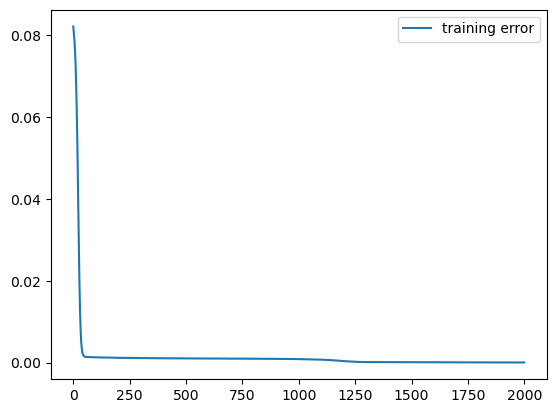

In [20]:
# plot history
pyplot.plot(ret.history['loss'], label='training error')
pyplot.legend()
pyplot.show()

In [21]:
while(True):
    print("Please enter the two sides of the triangle\n")
    print("Enter Side A:")
    sidea = float(input())
    print("Enter Side B:")
    sideb = float(input())
    holder = scaler.fit_transform(numpy.array([[sidea, sideb]]))
    prediction = model.predict(holder)
    ret = scaler.inverse_transform(numpy.array([[prediction[0][0], 0]]))
    print("The predicted Third Side is: {}\n".format(ret[0][0]))
print("Done")

Please enter the two sides of the triangle

Enter Side A:
100
Enter Side B:
150
1/1 [==============================] - 0s 162ms/step
The predicted Third Side is: 191.0658207423985

Please enter the two sides of the triangle

Enter Side A:
10
Enter Side B:
15
1/1 [==============================] - 0s 33ms/step
The predicted Third Side is: 96.27645935676992

Please enter the two sides of the triangle

Enter Side A:
1000
Enter Side B:
1400
1/1 [==============================] - 0s 20ms/step
The predicted Third Side is: 1716.3746384382248

Please enter the two sides of the triangle

Enter Side A:
i


ValueError: could not convert string to float: 'i'

### The neural network model has low accuracy when input test is low, and its results suggest a trend where higher input values lead to more accurate predictions.